In [20]:
import numpy as np
import pandas as pd

from sklearn.metrics import accuracy_score

from matplotlib import pyplot as plt

np.set_printoptions(suppress = True)

In [21]:
def cross_entropy_loss(reference_Y, predicted_Y):
    
    loss = 0
    total_samples = reference_Y.shape[0]
    
    for reference_y, predicted_y in zip(reference_Y, predicted_Y):

        log_predicted_y = np.log(predicted_y)
        
        loss += (reference_y * log_predicted_y).sum()
    
    loss =  -1 * (1 / total_samples) * loss
    
    return loss
    
def one_hot_encoding(values):
    
    classes = np.unique(values).tolist()
    
    total_classes = len(classes)
    
    outputs = []
    
    for value in values:
        
        index = classes.index(value)
        
        output = np.zeros(total_classes)
        output[index] = 1
        
        outputs.append(output)
        
    outputs = np.array(outputs)
    
    return outputs

class SoftmaxRegression:
    
    def __init__(self, eta0 = 0.01, fit_intercept = True):
        
        self.eta0 = eta0
        self.fit_intercept = fit_intercept
        
        self.intercept_ = np.array([])
        self.coef_ = np.array([])
    
    def _softmax(self, S):
        
        E = np.exp(S)
        return E / E.sum()
    
    def partial_fit(self, X, Y):

        n_classes = Y.shape[1]
        
        if (not self.intercept_.any()):
            self.intercept_ = np.zeros(n_classes)
        
        if (not self.coef_.any()):
            self.coef_ = np.zeros((n_classes, X.shape[1]))
        
        for inputs, targets in zip(X, Y):

            if (self.fit_intercept):
            
                S = np.dot(inputs, self.coef_.T) + self.intercept_

                sigma = self._softmax(S)

                for n_class in range(n_classes):

                    self.intercept_[n_class] = self.intercept_[n_class] - (self.eta0 * (sigma[n_class] - targets[n_class])) 
                    self.coef_[n_class] = self.coef_[n_class] - (self.eta0 * (sigma[n_class] - targets[n_class]) * inputs)
                    
            else:
                
                S = np.dot(inputs, self.coef_.T)

                sigma = self._softmax(S)

                for n_class in range(self.n_classes_):

                    self.coef_[n_class] = self.coef_[n_class] - (self.eta0 * (sigma[n_class] - targets[n_class]) * inputs)
    
    def predict(self, X):
        
        outputs = []
        
        X = self.predict_proba(X)
        
        for inputs in X:
        
            output = np.argmax(inputs)
            
            outputs.append(output)
            
        outputs = np.array(outputs)
        
        return outputs
    
    def predict_proba(self, X):
        
        outputs = []
        
        for inputs in X:
            
            if (self.fit_intercept):
            
                S = np.dot(inputs, self.coef_.T) + self.intercept_
            
                output = self._softmax(S)
            
            else:
                
                S = np.dot(inputs, self.coef_.T)
            
                output = self._softmax(S)
            
            outputs.append(output)
            
        outputs = np.array(outputs)
        
        return outputs

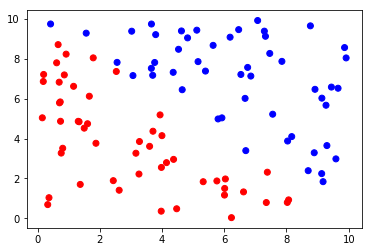

In [22]:
total_data = 200

X = np.random.uniform(0, 10, size = (100, 2))

y = [ int(((i + j) / 2) >= 5) for i, j in X ]

color = [ 'red' if i == 0 else 'blue' for i in y ]

plt.scatter(X[:, 0], X[:, 1], color = color)

plt.xticks()
plt.yticks()

plt.show()

In [23]:
training_size = 0.8

total = X.shape[0]

training_size = round(total * training_size)
validation_size = total - training_size

training_X = X[:training_size]
validation_X = X[training_size:]

training_y = y[:training_size]
validation_y = y[training_size:]

encoded_training_Y = one_hot_encoding(training_y)
encoded_validation_Y = one_hot_encoding(validation_y)

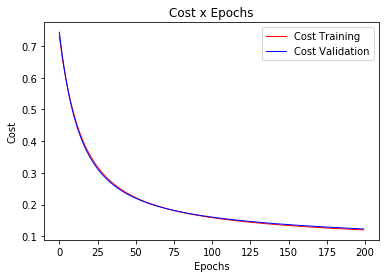

Intercepts: [ 5.20293129 -5.20293129]
Coefficients: [[-0.56177616 -0.49147571]
 [ 0.56177616  0.49147571]]


In [24]:
epochs = 200

classifier = SoftmaxRegression(eta0 = 0.01, fit_intercept = True)

training_epochs = []
validation_epochs = []

for epoch in range(epochs): 

    classifier.partial_fit(training_X, encoded_training_Y)
    
    predicted_training_Y = classifier.predict_proba(training_X)
    training_loss = cross_entropy_loss(encoded_training_Y, predicted_training_Y)
    
    training_epochs.append([epoch, training_loss])
    
    predicted_validation_Y = classifier.predict_proba(validation_X)
    validation_loss = cross_entropy_loss(encoded_validation_Y, predicted_validation_Y)
    
    validation_epochs.append([epoch, validation_loss])
    
training_df = pd.DataFrame(data = training_epochs, columns = ['Epoch', 'Cost'])
validation_df = pd.DataFrame(data = validation_epochs, columns = ['Epoch', 'Cost'])

plt.plot(training_df['Epoch'], training_df['Cost'], linewidth = 1.0, color = 'red')
plt.plot(validation_df['Epoch'], validation_df['Cost'], linewidth = 1.0, color = 'blue')

plt.xlabel('Epochs')
plt.ylabel('Cost')

plt.title("Cost x Epochs")
plt.legend(['Cost Training', 'Cost Validation'])

plt.show()
    
print("Intercepts: " + str(classifier.intercept_))
print("Coefficients: " + str(classifier.coef_))

In [25]:
predicted_y = classifier.predict(validation_X)
accuracy_score(validation_y, predicted_y)

1.0

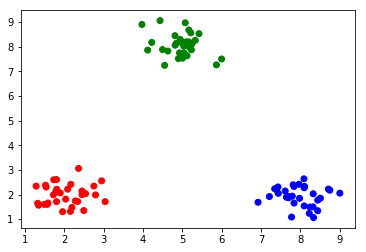

In [26]:
x1 = np.stack([np.random.normal(2, 0.5, 33), np.random.normal(2, 0.5, 33), [0] * 33], axis = 1)
x2 = np.stack([np.random.normal(5, 0.5, 33), np.random.normal(8, 0.5, 33), [1] * 33], axis = 1)
x3 = np.stack([np.random.normal(8, 0.5, 33), np.random.normal(2, 0.5, 33), [2] * 33], axis = 1)

data = np.concatenate((x1, x2, x3))

np.random.shuffle(data)

color = []

for x1, x2, y in data:
    
    if (y == 0):
        color.append('red')
    elif (y == 1):
        color.append('green')
    else:
        color.append('blue')

plt.scatter(data[:, 0], data[:, 1], color = color)

plt.xticks()
plt.yticks()

plt.show()

In [27]:
X = data[:, 0:2]
y = data[:, 2]

In [28]:
training_size = 0.8

total = X.shape[0]

training_size = round(total * training_size)
validation_size = total - training_size

training_X = X[:training_size]
validation_X = X[training_size:]

training_y = y[:training_size]
validation_y = y[training_size:]

encoded_training_Y = one_hot_encoding(training_y)
encoded_validation_Y = one_hot_encoding(validation_y)

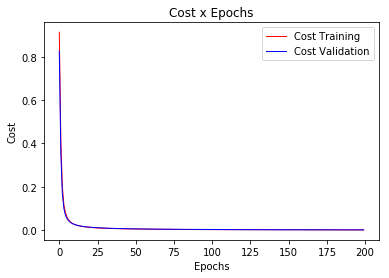

Intercepts: [ 6.27505115 -4.6296343  -1.64541685]
Coefficients: [[-0.77751383  0.11448344]
 [-1.33681721  2.7901195 ]
 [ 2.11433105 -2.90460294]]


In [29]:
epochs = 200

classifier = SoftmaxRegression(eta0 = 0.1, fit_intercept = True)

training_epochs = []
validation_epochs = []

for epoch in range(epochs): 

    classifier.partial_fit(training_X, encoded_training_Y)
    
    predicted_training_Y = classifier.predict_proba(training_X)
    training_loss = cross_entropy_loss(encoded_training_Y, predicted_training_Y)
    
    training_epochs.append([epoch, training_loss])
    
    predicted_validation_Y = classifier.predict_proba(validation_X)
    validation_loss = cross_entropy_loss(encoded_validation_Y, predicted_validation_Y)
    
    validation_epochs.append([epoch, validation_loss])
    
training_df = pd.DataFrame(data = training_epochs, columns = ['Epoch', 'Cost'])
validation_df = pd.DataFrame(data = validation_epochs, columns = ['Epoch', 'Cost'])

plt.plot(training_df['Epoch'], training_df['Cost'], linewidth = 1.0, color = 'red')
plt.plot(validation_df['Epoch'], validation_df['Cost'], linewidth = 1.0, color = 'blue')

plt.xlabel('Epochs')
plt.ylabel('Cost')

plt.title("Cost x Epochs")
plt.legend(['Cost Training', 'Cost Validation'])

plt.show()
    
print("Intercepts: " + str(classifier.intercept_))
print("Coefficients: " + str(classifier.coef_))

In [30]:
predicted_y = classifier.predict(validation_X)
accuracy_score(validation_y, predicted_y)

1.0